The first cell contain a simple test to compare ZipinBrdf vs BeckmanBrdf.

theta_o is set to 60 degrees, phi_o is 0, u is set at (.5, .5), so phi_i= u2 * 2PI = PI.

I created a ZipinBrdf and used its Sample(Wo) method to generate a tuple output:  (brdf_value, pdf, Wi).    Then I invoke ZipinBrdf.eval(Wo, wi).  I compare the return of ZipinBrdf.Eval(Wo, ZipinBrdf.Sample(Wo)) with the (value, pdf) output of Zipin.Sample(Wo).  For the Brdf to be correct, I expect the ZipinBrdf.Eval(Wo, Wi returned by ZipinBrdf.Sample(Wo)) == (value, pdf) returned by ZipinBrdf.Sample(Wo).
You can see this test is confirmed by Beckman brdf.

For now, ZipinBrdf Eval is not working.  But I believe ZipinBrdf Sample is mostly correct.


Also the brdf value returned by ZipinBrdf is consistently lower than the brdf values computed by Beckman brdf, with values that seem to be within the range of  "zipin ratio" * the beckman brdf values.


In [1]:
import vec3;
wo = vec3.Vec3(0.8660254037844386, 0.0, 0.5000000000000001);
wi = vec3.Vec3(-0.915366761231543, -0.0, 0.4026210283038819)
mid = (wo+wi).norm()
print(mid)
wh = vec3.Vec3(-0.14462938797220776, 0, 0.9894858968852384);

Vec3(-0.05458304151317585, 0.0, 0.9985092345988449)


In [1]:
import sys;
sys.path.append('/usr/local/lib/python3.6/site-packages')
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;
alpha = .4
zipinVersion = 'Feng'
zipin= brdf.ZipinBrdf(alpha, alpha, zipinVersion);
theta_o = math.radians(71.1);

phi_o = 0;
wo = vec3.Vec3(math.sin(theta_o) * math.cos(phi_o), math.sin(theta_o) * math.sin(phi_o), math.cos(theta_o));
u = (.1, .1)
print(wo, u)



maxBounce = 1
zsample =zipin.Sample(wo, u, maxBounce);
if zsample[0]>0:
    zeval = zipin.Eval(wo, zsample[2], maxBounce);
    print(zsample[2])
    print(zeval, zsample[0], zsample[1]);
    print(math.degrees(zsample[3]))
    print(math.degrees(math.atan2(zsample[2].y, zsample[2].x)))

beckman = brdf.Brdf(alpha, alpha);
bsample = beckman.Sample(wo, u, GMode = 0);
if bsample[0]>0:
    beval = beckman.Eval(wo, bsample[2], GMode = 0);
    print(bsample[2]);
    print(beval, bsample);

zipinVersion:  Feng
Vec3(0.9460853588275453, 0.0, 0.32391741819814956) (0.1, 0.1)
Vec3(-0.8586334723959796, 0.06353751464682747, 0.5086369474524307)
(1.428889710356292, 1.09342809867658) 1.428889710356292 1.09342809867658
59.426919921815795
175.76791660602612
Vec3(-0.8586334723959796, 0.06353751464682747, 0.5086369474524307)
(1.4288897103562908, 1.0934280986765792) (1.4288897103562908, 1.0934280986765792, <vec3.Vec3 object at 0x10dfd06d8>, 1.0371954169546969)


zipinVersion:  Feng
1.2409290981679681 1.2409390981679682


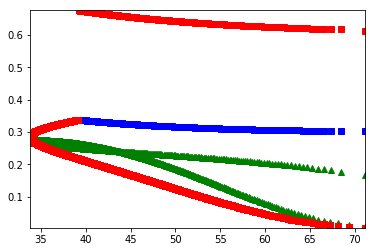

In [7]:
import sys;
sys.path.append('/usr/local/lib/python3.6/site-packages')
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;

#pat, change this value to see the shape of the plots change
alpha = .9

#change this to 'Pat" to use Pat's zipin inplementation
zipinVersion = 'Feng'

beckman = brdf.Brdf(alpha, alpha);
zipin= brdf.ZipinBrdf(alpha, alpha,  zipinVersion);

theta_o = math.radians(71.1);
phi_o = 0
wo = vec3.Vec3(math.sin(theta_o) * math.cos(phi_o), math.sin(theta_o) * math.sin(phi_o), math.cos(theta_o))
maxBounce = 3

xdata= [];              
zdata=[]; 
bdata = [];
blin_data = []
zsamples = []
bsamples = []
sampleCount = 1000

for i in range(sampleCount):
    u = ((float)(i))/(sampleCount)
    usample = (u, .1)
    bsample = beckman.Sample(wo, usample, GMode = 1)
    blin_sample = beckman.Sample(wo, usample, GMode = 2) 
    zsample = zipin.Sample(wo, usample, maxBounce)
    if (zsample[0] == 0):
        continue
    

    #xdata.append(bsample[2].z)
    xdata.append(math.degrees(zsample[3]))
    bdata.append(bsample[0])
    blin_data.append(blin_sample[0])
    zdata.append(zsample[0])
  
plt.plot(xdata, blin_data, 'bs');
plt.plot(xdata, bdata, 'g^');
plt.plot(xdata, zdata, 'rs');    
#plt.plot(xdata, blin_data, color = 'blue');
#plt.plot(xdata, bdata, color = 'green');
#plt.plot(xdata, zdata, color = 'red');
plt.autoscale(True, 'both', True)
plt.show()  



In [5]:

import brdf;
import vec3;
import math;
import random;

import microfacet;

#pat, change this value to see the shape of the plots change
alpha = .2

#change this to 'Pat" to use Pat's zipin inplementation
zipinVersion = 'Feng'

beckman = brdf.Brdf(alpha, alpha);
zipin= brdf.ZipinBrdf(alpha, alpha,  zipinVersion);

theta_o = math.radians(26.1);
phi_o = 0
wo = vec3.Vec3(math.sin(theta_o) * math.cos(phi_o), math.sin(theta_o) * math.sin(phi_o), math.cos(theta_o))
maxBounce = 1
usample = (0, 0)
wi = zipin.Sample(wo, usample, maxBounce)
print (wo, wi)

zipinVersion:  Feng
0.45553093477052 0.45554093477052
Vec3(0.43993916985591514, 0.0, 0.8980275757606156) (2.2153404207212044, 2.215345847154865, <vec3.Vec3 object at 0x10ca15e80>, 0.45553093477052)
